# DSCI Group Project Proposal: Predicting Heart Disease based on Age, Resting Blood Pressure, and Cholesterol Levels #

#### Clare Sheinin, Emese Soti, Saman Atiq, Sarah Teng ####

## Introduction ##

Heart disease is a term that refers to a variety of conditions that affect the heart. Common conditions include coronary artery disease and exercise-induced angina. Several factors are associated with heart disease, including high blood pressure, high levels of sodium, cholesterol, sugar, and fats, and increasing age (Dalen et al., 2014). In the US, heart disease is the greatest cause of death for both men and women, claiming one life every 33 seconds. In 2021, 695,000 people died from heart disease (CDC, 2023). Considering these stats, we decided to base our project on a knn classification algorithm that will help us predict the presence of heart disease. 

**Can we predict if a patient has heart disease based on their age, their resting blood pressure, and cholesterol levels?** 

We will assess the Cleveland Heart Disease dataset to help us answer this question. We will ignore the “?” values in our dataset and use the following column-names:
1. **age** - Patient's age
2. **sex** - Patient's sex
3. **cp** - Chest pain type
4. **trestbps** - Resting blood pressure
5. **chol** - Cholesterol level (mg/dl)
6. **fbs**- True if patient's fasting blood sugar > 120 mg/dl
7. **restecg** - Resting electrocardiographic 
8. **thalach** - Maximum heart rate
9. **exang** - Exercise-induced angina (yes or no)
10. **oldpeak** - ST exercise-induced Depression
11. **slope** - Slope of the peak exercise ST segment 
12. **ca** - Number of major vessels (0-3) 
13. **thal** - Presence of thalassemia 
14. **num** - Diagnosis of heart disease (val= 0 indicates absence of heart disease, val= (1, 2, 3, 4) shows presence of heart disease

## Cleaning and wrangling the data set: ##

### loading the libraries and the data set:

In [1]:
# Loading tidyverse libraries
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source("tests.R")
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
# Reading in the Data
cleveland <- read_csv("processed.cleveland.data")
cleveland

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [3]:
# The data had no column names, so here we added them
columns <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland <- read_csv("processed.cleveland.data", col_names = columns)
cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [4]:
# Here we changed our variables of interest into factors and integers to make them easier to work with/plot
# The 'num' column becomes 'yes' or 'no' based on whether the number indicates heart disease
cleveland_tidy <- cleveland |>
  mutate(
    num = as.factor(as.integer(num)),
    num = recode(num, "0" = "No", "1" = "Yes", "2" = "Yes", "3" = "Yes", "4" = "Yes"),
    restecg = as.integer(restecg),
    restecg = recode(restecg, "0" = "0", "1" = "1", "2" = "1"),
    exang = as.integer(exang),
    age = as.integer(age),
    restecg = as.integer(restecg),
    trestbps = as.integer(trestbps),
    chol = as.integer(chol)
      )
cleveland_tidy

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,1,150,0,2.3,3,0.0,6.0,No
67,1,4,160,286,0,1,108,1,1.5,2,3.0,3.0,Yes
67,1,4,120,229,0,1,129,1,2.6,2,2.0,7.0,Yes
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,Yes
57,0,2,130,236,0,1,174,0,0.0,2,1.0,3.0,Yes
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,No


## Method:
### Data analysis:
We first loaded the data set into our proposal and added column headings to the dataset since they were missing in the original file. Then we split the data set into the training and testing data set using the optimal 75:25 ratio. After analysing the values of resting ecg, exercise-induced angina, resting blood pressure and cholesterol levels, we saw that the average age is higher for those with heart disease, and ​​on average heart disease patients had higher resting blood pressure and higher cholesterol. 
Therefore we decided to use age, trestbps, and chol columns as predictors for our data analyses to predict the "num" column (diagnosis).



### Visualizing the results:
We will use a scatter plot to plot resting blood pressure, age and cholesterol levels to show the correlation and predict the diagnosis of the patient. 
The points will be colored and shaped based on diagnosis, with no representing absence, and yes representing the presence of heart disease.



In [5]:
# Splitting the data into training and testing sets
cleveland_split <- initial_split(cleveland_tidy, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

In [6]:
# Summarizing the data
cleveland_table <- cleveland_train |>
    group_by(num) |>
    summarize(n_obs = n(), age_avg = mean(age), restecg_avg = mean(restecg), 
              exang_avg = mean(exang), trestbps_avg = mean(trestbps), chol_avg = mean(chol))
cleveland_table
# We can see from this table that the average age is higher for those with heart disease
# On average more patients with heart disease had abnormal ECG and angina values (1 = abnormal)
# On average heart disease patients had higher resting blood pressure and higher cholesterol

num,n_obs,age_avg,restecg_avg,exang_avg,trestbps_avg,chol_avg
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
No,123,52.26829,0.4065041,0.1544715,128.3821,243.6911
Yes,104,56.44231,0.5865385,0.5384615,134.5192,252.5385


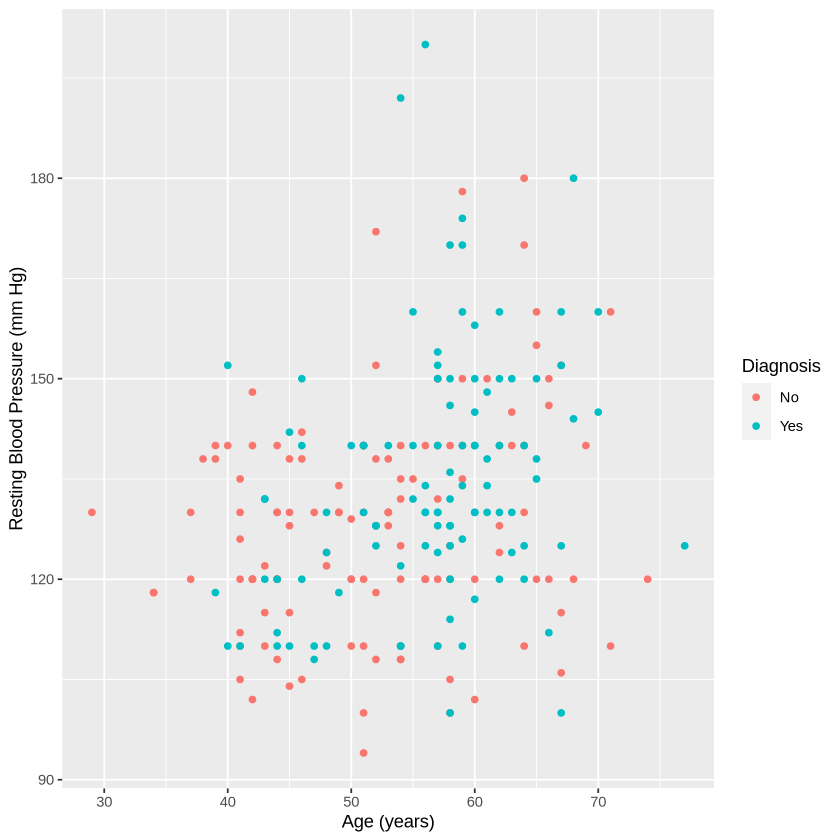

In [7]:
plot_1 <- ggplot(cleveland_train, aes(x = age, y = trestbps, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Resting Blood Pressure (mm Hg)", color = "Diagnosis")       
plot_1
# There's a slight positive trend in the data, with a higher concentration of "Yes" diagnoses farther from the origin

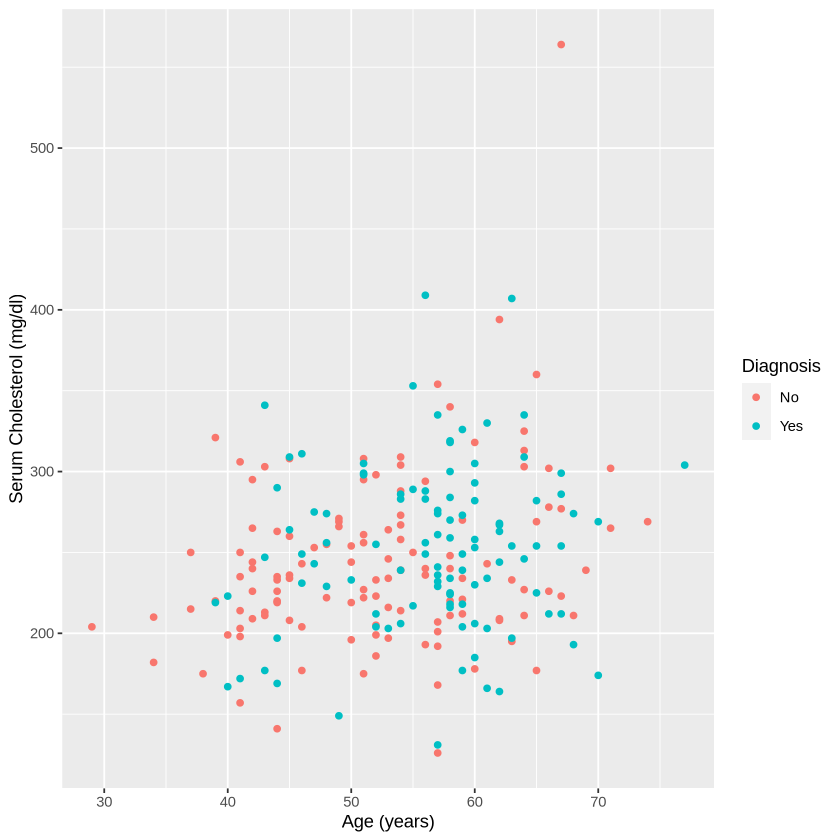

In [8]:
plot_2 <- ggplot(cleveland_train, aes(x = age, y = chol, color = num)) +
          geom_point() +
          labs (x = "Age (years)", y = "Serum Cholesterol (mg/dl)", color = "Diagnosis")       
plot_2
# Again, there's a slight positive trend in the data, with a higher concentration of "Yes" diagnoses farther from the origin

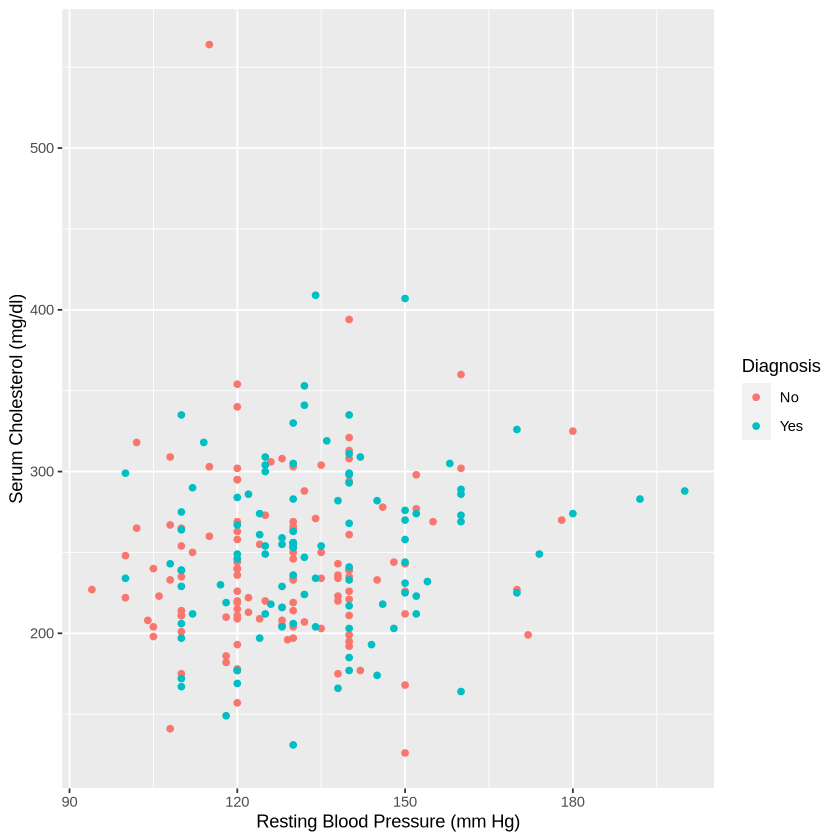

In [9]:
plot_3 <- ggplot(cleveland_train, aes(x = trestbps, y = chol, color = num)) +
          geom_point() +
          labs (x = "Resting Blood Pressure (mm Hg)", y = "Serum Cholesterol (mg/dl)", color = "Diagnosis")       
plot_3
# Again, there's a slight positive trend in the data, but no clear higher concentration of diagnoses

## Expected Outcomes and Significance ##

We expect the risk of heart disease is influenced by blood pressure, cholesterol levels, presence of angina, resting ECG, and age. Patients with heart disease are more likely to have angina, high blood pressure, high cholesterol levels, and be older in age. 

These findings could be used to develop programs that help doctors diagnose potential heart conditions. Additionally, this data can help patients visualize how these factors influence the presence of heart disease to discuss with doctors about what they may do to reduce their risk. 

This analysis could lead to more investigations into how significant each factor is to the risk of heart disease.

## References: ##

- CDC. (2023, May 15). Heart disease facts. Centers for Disease Control and Prevention. https://www.cdc.gov/heartdisease/facts.htm
- Dalen, J. E. et al. (2014, September). The Epidemic of the 20th Century: Coronary Heart Disease. ScienceDirect. https://www.sciencedirect.com/science/article/pii/S0002934314003544?casa_token=_36v0JdxfakAAAAA:BnwjoW6neks6CjsRkrlIL6q9CeQJS_xmTMvD1s41q6E1pQPv-9vFccwtaHn_lp4t6MomcHFFVQ
